In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load data from the Excel file
file_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data\new data-3 - revised with new data.xlsx"
ti_data = pd.read_excel(file_path, sheet_name='Ti')
o2_data = pd.read_excel(file_path, sheet_name='O2')

# Function to normalize only the density feature
def normalize_density(df):
    scaler = StandardScaler()
    df_normalized = df.copy()
    
    # Normalize the density feature
    features = df[['Density (g/cm3)']]
    df_normalized[['Density (g/cm3)']] = scaler.fit_transform(features)
    
    return df_normalized, scaler

# Function to prepare and filter data based on temperature
def get_data_by_temperature(df, temperature):
    return df[df['T (K)'] == temperature]

# Function to combine data from two sheets and prepare the dataset
def combine_data(temp, ti_data, o2_data):
    ti_temp_data = get_data_by_temperature(ti_data, temp)
    o2_temp_data = get_data_by_temperature(o2_data, temp)
    
    if ti_temp_data.empty or o2_temp_data.empty:
        print(f"No data available for temperature {temp} in one or both sheets.")
        return None
    
    # Combine the normalized data from Ti and O2 based on the given temperature
    combined_data = pd.DataFrame({
        'T (K)': ti_temp_data['T (K)'],
        'Density_Ti': ti_temp_data['Density (g/cm3)'].values,
        'Density_O2': o2_temp_data['Density (g/cm3)'].values,
        'Specific_Heat_Ti': ti_temp_data['Specific Heat (J/g.C)'].values,
        'Specific_Heat_O2': o2_temp_data['Specific Heat (J/g.C)'].values
    })
    
    # Calculate combined properties (e.g., weighted average)
    combined_data['Density_combined'] = (combined_data['Density_Ti'] + combined_data['Density_O2']) / 2
    combined_data['Specific_Heat_combined'] = (combined_data['Specific_Heat_Ti'] + combined_data['Specific_Heat_O2']) / 2
    
    return combined_data

# Function to create features and target variables
def create_features_and_targets(combined_data):
    features = combined_data[['T (K)', 'Density_Ti', 'Density_O2', 'Specific_Heat_Ti', 'Specific_Heat_O2']]
    targets = combined_data[['Density_combined', 'Specific_Heat_combined']]
    return features, targets

# Function to train the ANN model
def train_ann_model(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    
    # Split the data
    if len(X_scaled) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    
    # Train the ANN model
    ann_model = MLPRegressor(hidden_layer_sizes=(100, 25), activation='relu', solver='adam', max_iter=1000, random_state=42)
    ann_model.fit(X_train, y_train)
    
    # Predictions and evaluations
    y_pred_ann = ann_model.predict(X_test)
    mse_ann = mean_squared_error(y_test, y_pred_ann)
    
    print(f"ANN Mean Squared Error: {mse_ann:.4f}")
    
    return ann_model, scaler

# Function to predict properties based on a given temperature
def predict_properties(temp, ti_data, o2_data):
    ti_data_normalized, scaler_ti = normalize_density(ti_data)
    o2_data_normalized, _ = normalize_density(o2_data)
    
    combined_data = combine_data(temp, ti_data_normalized, o2_data_normalized)
    
    if combined_data is None:
        return
    
    X, y = create_features_and_targets(combined_data)
    ann_model, scaler = train_ann_model(X, y)
    
    # Prepare input for prediction
    X_scaled = scaler.transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    
    # Predict using the ANN model
    predictions_ann = ann_model.predict(X_scaled)
    
    # Ensure predictions are non-zero
    predictions_ann = np.maximum(predictions_ann, 1e-5)
    
    # Display predictions
    print(f"Predicted Properties for TiO2 at {temp} K:")
    print(f"Density (g/cm3): {predictions_ann[0][0]:.4f}")
    print(f"Specific Heat (J/g.C): {predictions_ann[0][1]:.4f}")

# Example usage
def get_valid_temperature_input():
    while True:
        try:
            temperature = float(input("Enter temperature (K): "))
            return temperature
        except ValueError:
            print("Invalid input. Please enter a numeric value for the temperature.")

# Predict properties
temperature = get_valid_temperature_input()
predict_properties(temperature, ti_data, o2_data)


Enter temperature (K): 334.15
ANN Mean Squared Error: 0.0015
Predicted Properties for TiO2 at 334.15 K:
Density (g/cm3): 1.1425
Specific Heat (J/g.C): 0.6772


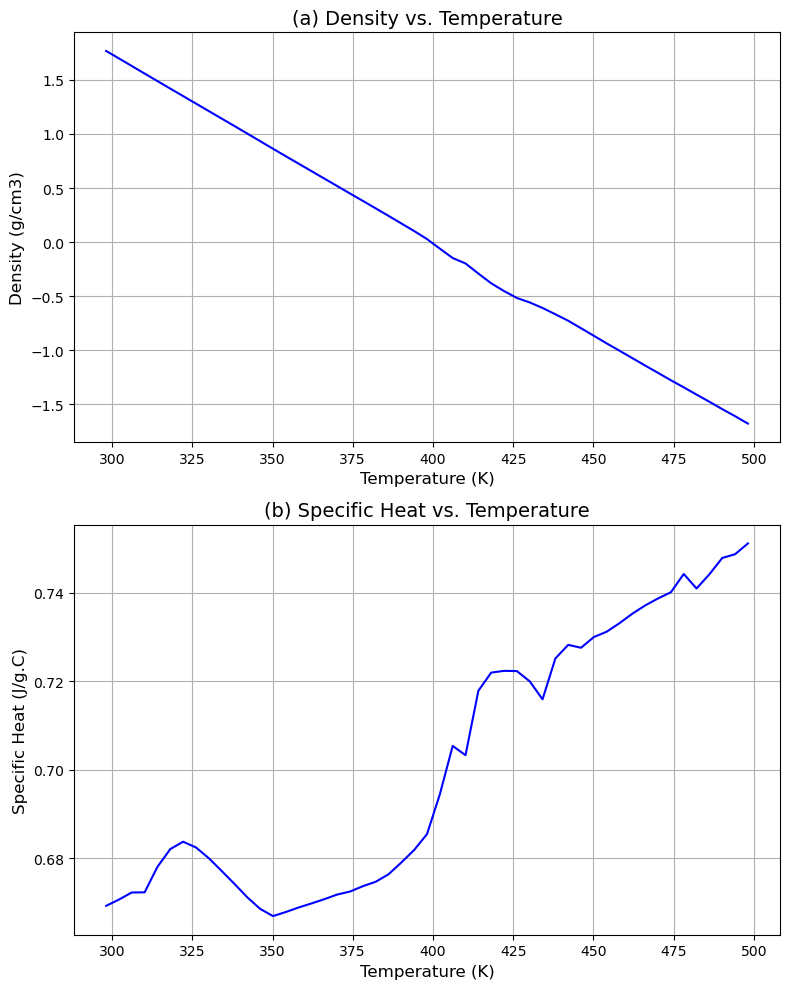

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Load data from the Excel file
file_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data\new data-3 - revised with new data.xlsx"
ti_data = pd.read_excel(file_path, sheet_name='Ti')
o2_data = pd.read_excel(file_path, sheet_name='O2')

# Function to normalize only the density feature
def normalize_density(df):
    scaler = StandardScaler()
    df_normalized = df.copy()
    
    # Normalize the density feature
    features = df[['Density (g/cm3)']]
    df_normalized[['Density (g/cm3)']] = scaler.fit_transform(features)
    
    return df_normalized, scaler

# Function to prepare and filter data based on temperature
def get_data_by_temperature(df, temperature):
    return df[df['T (K)'] == temperature]

# Function to combine data from two sheets and prepare the dataset
def combine_data(temp, ti_data, o2_data):
    ti_temp_data = get_data_by_temperature(ti_data, temp)
    o2_temp_data = get_data_by_temperature(o2_data, temp)
    
    if ti_temp_data.empty or o2_temp_data.empty:
        return None
    
    # Combine the normalized data from Ti and O2 based on the given temperature
    combined_data = pd.DataFrame({
        'T (K)': ti_temp_data['T (K)'],
        'Density_Ti': ti_temp_data['Density (g/cm3)'].values,
        'Density_O2': o2_temp_data['Density (g/cm3)'].values,
        'Specific_Heat_Ti': ti_temp_data['Specific Heat (J/g.C)'].values,
        'Specific_Heat_O2': o2_temp_data['Specific Heat (J/g.C)'].values
    })
    
    # Calculate combined properties (e.g., weighted average)
    combined_data['Density_combined'] = (combined_data['Density_Ti'] + combined_data['Density_O2']) / 2
    combined_data['Specific_Heat_combined'] = (combined_data['Specific_Heat_Ti'] + combined_data['Specific_Heat_O2']) / 2
    
    return combined_data

# Function to create features and target variables
def create_features_and_targets(combined_data):
    features = combined_data[['T (K)', 'Density_Ti', 'Density_O2', 'Specific_Heat_Ti', 'Specific_Heat_O2']]
    targets = combined_data[['Density_combined', 'Specific_Heat_combined']]
    return features, targets

# Function to train the ANN model
def train_ann_model(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    
    # Split the data
    if len(X_scaled) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    
    # Train the ANN model
    ann_model = MLPRegressor(hidden_layer_sizes=(100, 25), activation='relu', solver='adam', max_iter=1000, random_state=42)
    ann_model.fit(X_train, y_train)
    
    return ann_model, scaler

# Function to predict properties for all temperatures and plot the results
def predict_and_plot_all_temperatures(ti_data, o2_data):
    ti_data_normalized, scaler_ti = normalize_density(ti_data)
    o2_data_normalized, _ = normalize_density(o2_data)
    
    # Get all unique temperatures in the data
    all_temperatures = ti_data['T (K)'].unique()

    # Create lists to store the results
    temperature_list = []
    density_predictions = []
    specific_heat_predictions = []

    for temp in all_temperatures:
        combined_data = combine_data(temp, ti_data_normalized, o2_data_normalized)
        
        if combined_data is None:
            continue
        
        X, y = create_features_and_targets(combined_data)
        ann_model, scaler = train_ann_model(X, y)
        
        # Prepare input for prediction
        X_scaled = scaler.transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
        
        # Predict using the ANN model
        predictions_ann = ann_model.predict(X_scaled)
        
        # Store the results for plotting
        temperature_list.append(temp)
        density_predictions.append(predictions_ann[0][0])
        specific_heat_predictions.append(predictions_ann[0][1])

    # Plot the results
    plot_results(temperature_list, density_predictions, specific_heat_predictions)

# Function to plot the predicted results
def plot_results(temperature, density, specific_heat):
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Plot (a) - Density vs. Temperature
    axs[0].plot(temperature, density, color='blue', linestyle='-', marker=None)
    axs[0].set_title('(a) Density vs. Temperature', fontsize=14)
    axs[0].set_xlabel('Temperature (K)', fontsize=12)
    axs[0].set_ylabel('Density (g/cm3)', fontsize=12)
    axs[0].grid(True)

    # Plot (b) - Specific Heat vs. Temperature
    axs[1].plot(temperature, specific_heat, color='blue', linestyle='-', marker=None)
    axs[1].set_title('(b) Specific Heat vs. Temperature', fontsize=14)
    axs[1].set_xlabel('Temperature (K)', fontsize=12)
    axs[1].set_ylabel('Specific Heat (J/g.C)', fontsize=12)
    axs[1].grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Call the function to predict and plot for all temperatures
predict_and_plot_all_temperatures(ti_data, o2_data)
